## Note
- this is a notebook going through the "Probably the simplest BIP in the world" presented in the CUQIpy minibook 
- we will be using this problem as a first benchmark problem, solving the inverse problem propsed and comparing different ways of solving this problem 
 



## <font color=#CD853F>The forward model </font> <a class="anchor" id="r-the-forward-model"></a>

Consider the following inverse problem: given observed data $b$, determine $x_1$, and $x_2$:

$$b = x_1 + x_2 + e \;\;\mathrm{with}\;\; e \sim \mathrm{Gaussain}(0, 0.1)$$

We can write it as:

$$b = \mathbf{A}\mathbf{x} + e = \large(1,1\large)\binom{x_1}{x_2} + e$$


|variable     |    description          |dimension      |
|:------------|:------------------------|:--------------|
|$\mathbf{x}$ |parameter to be inferred |2-dimensional​  |
|$\mathbf{A}$ |forward model            |1-by-2 matrix  |
|$b$          |data                     | 1-dimensional |
|$e$          |noise                    |1-dimensional  ​|

This problem is:
* Considered Linear inverse problem since the forward model is linear.
* Ill-posed since solution not unique (Hadamard 2), i.e., for some given value of $b$, e.g., $b=3$, all points $(x_1, x_2)$ that satisfy $x_1 + x_1 = 3$ are solutions to the (noise-free) problem.

__Importing required libaries__

In [348]:
# Importing the required libraries
from cuqi.distribution import Gaussian
from cuqi.problem import BayesianProblem
from cuqi.model import LinearModel
import numpy as np
import matplotlib.pyplot as plt
import cuqi

1.__Defining the linear model A__



- create a np.array of the form that the linear model will have

In [324]:
A_matrix = np.array([[1.0, 1.0]])

- according to the table above, there the matrix A is 2x1 matrix 

In [325]:
A_matrix.shape

(1, 2)

- create the __linear model__, with the desired CUQIpy structure 
\
*Note*: there are other models available in the CUQIpy package 

In [328]:
A = LinearModel(A_matrix)
A

CUQI LinearModel: _DefaultGeometry1D(2,) -> _DefaultGeometry1D(1,).
    Forward parameters: ['x'].

Linear model it has the following attributes:

- range gemetry 

In [335]:
A.range_geometry

_DefaultGeometry1D(1,)

- domain geometry 

In [336]:
A.domain_geometry

_DefaultGeometry1D(2,)

- Linear model has functions such as range and domain dimension

In [337]:
A.range_dim

1

In [338]:
A.domain_dim

2

*Note*: another thing to note is that from the linear model S we can get back to the np.array wiith the function get_matrix() 

In [339]:
A.get_matrix()

array([[1., 1.]])

In [341]:
type(A.get_matrix())

numpy.ndarray

**Note:** 
- when the model is linear A.forward(x) = A@x
- and therefore A@x = A_matrix@x

In [342]:
type(A@([0.1, 0.1]))

numpy.ndarray

In [343]:
type(A_matrix@([0.1, 0.1]))

numpy.ndarray

2. __Gaussian Distribution__
- as in the documentation we have the first term __mean__ and the second __cov__ 
- mean is the point where the peak exists 
- the covariance can be:
    - a scalar(the identity matrix multiplied with the scalar) 
    - a 1D vector (diag(vector))
    - a 2D vector

In [352]:
x = Gaussian(np.zeros(2), 2.5)


- creating functions to plot x

In [353]:
def plot2d(val, x1_min, x1_max, x2_min, x2_max, N2=201):
    # plot
    #pixelwidth_x = (x1_max-x1_min)/(N2-1)
    #pixelwidth_y = (x2_max-x2_min)/(N2-1)

    hp_x = 0.5*(x1_max-x1_min)/(N2-1)
    hp_y = 0.5*(x2_max-x2_min)/(N2-1)

    extent = (x1_min-hp_x, x1_max+hp_x, x2_min-hp_y, x2_max+hp_y)

    plt.imshow(val, origin='lower', extent=extent)
    plt.colorbar()


def plot_pdf_2D(distb, x1_min, x1_max, x2_min, x2_max, N2=201):
    N2 = 201
    ls1 = np.linspace(x1_min, x1_max, N2)
    ls2 = np.linspace(x2_min, x2_max, N2)
    grid1, grid2 = np.meshgrid(ls1, ls2)
    distb_pdf = np.zeros((N2,N2))
    for ii in range(N2):
        for jj in range(N2):
            distb_pdf[ii,jj] = np.exp(distb.logd([grid1[ii,jj], grid2[ii,jj]])) 
    plot2d(distb_pdf, x1_min, x1_max, x2_min, x2_max, N2)

C:\Users\Ich\AppData\Local\Temp\ipykernel_1968\379094849.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distb_pdf[ii,jj] = np.exp(distb.logd([grid1[ii,jj], grid2[ii,jj]]))


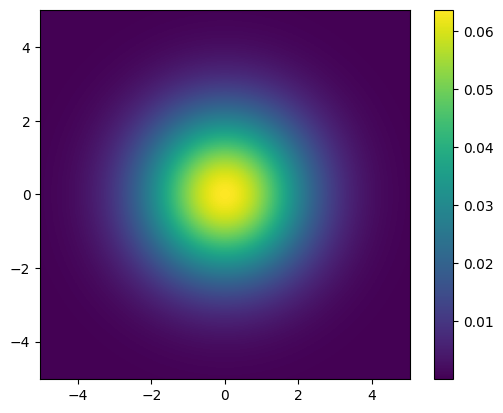

In [354]:
plot_pdf_2D(x, x1_min=-5, x1_max=5, x2_min=-5, x2_max=5)

### Notes on the sample function 
1. just one element
- when calling x.sample() or x.sample(1) it provides one random sample element of the form CUQIarray
- getting the value can be done one with the function print(x.sample())
- and getting the whole structure will be done when calling it 
- question: is there a way of getting just the array without printing it 
- answer the to_numpy function
2. more than one element
- when calling x.samples(n>1) it provides n random samples of the form CUQIarray
- getting the values of the array will be done with the attribute .samples 
- however in this case the print function no longer works it will give the following 
<cuqi.samples._samples.Samples object at 0x000001350F194170>





3. __Sampling x__

In [355]:
x_samples= x.sample(1000)

4. __Plotting samples__
-  plot_pair:  visualize the relationships between different variables in a dataset through pairwise plots
- if list of indeces is not specified 5 random samples will be plotted

In [403]:
print(x_samples)#.plot_pair()


5. __Compare sample data with true data visually__

C:\Users\Ich\AppData\Local\Temp\ipykernel_1968\379094849.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distb_pdf[ii,jj] = np.exp(distb.logd([grid1[ii,jj], grid2[ii,jj]]))


<Axes: xlabel='v0', ylabel='v1'>

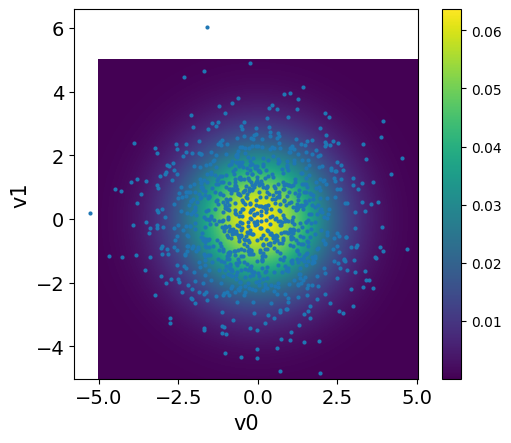

In [358]:
fig, ax = plt.subplots()

# Plot the 2D PDF
plot_pdf_2D(x, x1_min=-5, x1_max=5, x2_min=-5, x2_max=5)

# Plot the pair plot on the same axis
x_samples.plot_pair(ax=ax)


__Another example__

In [140]:
x_exercise= Gaussian(mean = np.zeros(2), cov = np.array([[1.0, 0.7], [0.7, 4.0]]))
x_exercise

CUQI Gaussian.

C:\Users\Ich\AppData\Local\Temp\ipykernel_1968\1366380294.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distb_pdf[ii,jj] = np.exp(distb.logd([grid1[ii,jj], grid2[ii,jj]]))


<Axes: xlabel='v0', ylabel='v1'>

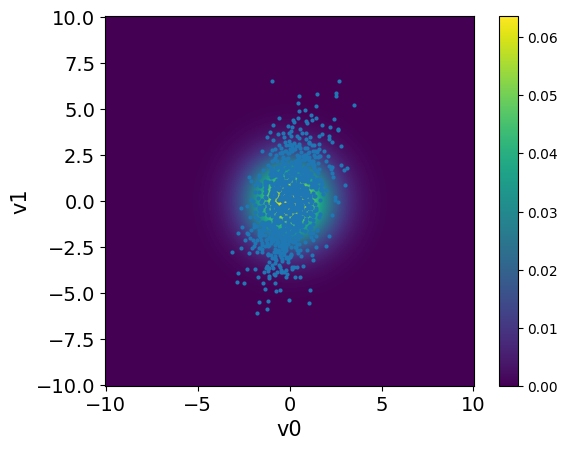

In [141]:
fig, ax = plt.subplots()

# Plot the 2D PDF
plot_pdf_2D(x, x1_min=-10, x1_max=10, x2_min=-10, x2_max=10)

# Plot the pair plot on the same axis
x_exercise.sample(1000).plot_pair(ax=ax)


6. __Noise distribution__
- we assume $e \sim \mathrm{Gaussain}(0, 0.1)$ 

In [360]:
e = Gaussian(0, 0.1)
e

CUQI Gaussian.

In [144]:
e.sample(1000)

array([[<Axes: title={'center': 'v'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

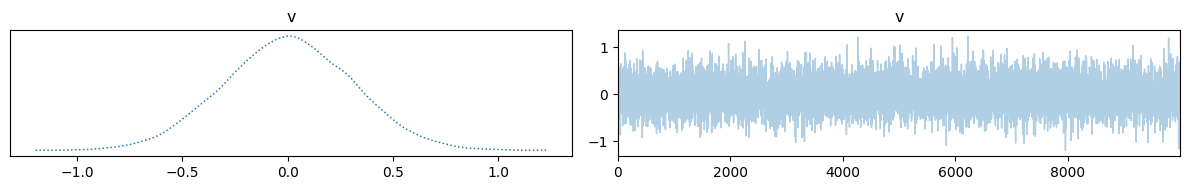

In [145]:
e.sample(10000).plot_trace()

In [146]:
def plot_pdf_1D(distb, min, max):
    grid = np.linspace(min, max, 1000)
    y = [distb.pdf(grid_point) for grid_point in grid]
    plt.plot(grid, y)

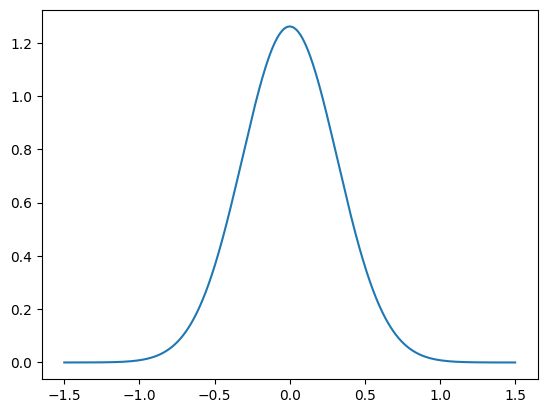

In [148]:
plot_pdf_1D(e, -1.5, 1.5)

7. __The data distribution__

- we have the following formula $b = \mathbf{A}\mathbf{x} + e $
- since $e \sim \mathrm{Gaussain}(0, 0.1)$
- we can say that 
$$ b | \mathbf{x} \sim \mathrm{Gaussian}(\mathbf{A}\mathbf{x}, \sigma^2\mathbf{I})$$

where we specified $\sigma^2 = 0.1$.

In [370]:
b_ofx= Gaussian(A@x, 0.1)
b_ofx

CUQI Gaussian. Conditioning variables ['x'].

_Note_ we cant sample b without a given value of x 

In [371]:
# Here we catch the error and print it
try:
    b_ofx.sample(10)
except Exception as e:
    print(e)

Cannot sample from conditional distribution. Missing conditioning variables: ['x']


In [368]:
specific =  np.array([1.5,1.5 ])

In [372]:
b_ofx(x = specific).sample()

CUQIarray: NumPy array wrapped with geometry.
---------------------------------------------

Geometry:
 _DefaultGeometry1D(1,)

Parameters:
 True

Array:
CUQIarray(2.8735399)

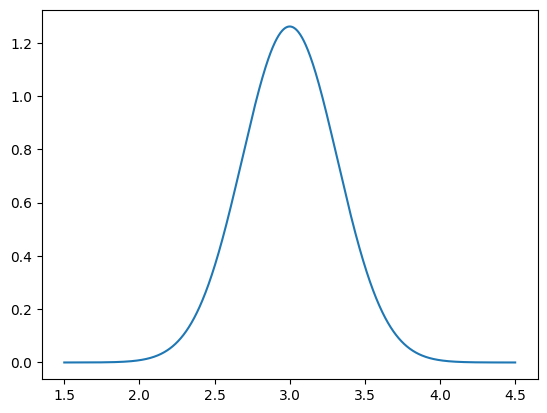

In [373]:
plot_pdf_1D(b_ofx(x = specific), 1.5, 4.5)

We can use `b_ofx` to simulate noisy data assuming that the true `x` parameters is `specific`:

In [385]:
bb = b_ofx(x = specific).sample()


8. __The likelyhood function__

Likelihood function: by fixing observed data $bb$ in the data distribution and considering the function of $\mathbf{x}$:

$$L (\mathbf{x} | bb) \mathrel{\vcenter{:}}= \pi (bb | \mathbf{x})$$


Example, given observed data  $bb $

$$L (x_1, x_2 | b=bb) = \frac{1}{\sqrt{2 \pi \cdot 0.1}} \mathrm{exp}\left(-\frac{(x_1+x_2- bb)^2}{2\cdot 0.1}\right) $$

__How likely is it for x = [x1,x2] to get bb__

In [386]:
likelihood = b_ofx(b_ofx=bb)
print(likelihood)

CUQI Gaussian Likelihood function. Parameters ['x'].


In [387]:
try:
    likelihood.pdf(x=specific)
except Exception as e:
    print(e)

'Likelihood' object has no attribute 'pdf'


In [388]:
x.pdf(specific)

array([0.02588303])

- we can evaluate its log-density:

In [393]:
likelihood.logd(x=specific)

CUQIarray: NumPy array wrapped with geometry.
---------------------------------------------

Geometry:
 _DefaultGeometry1D(1,)

Parameters:
 True

Array:
CUQIarray([-0.48482391])

_Note_
the likelihood function is a density function and is not a distribution. If we try to compute `pdf` for example, we will get an error:

We plot the likelihood function for the observed data 

C:\Users\Ich\AppData\Local\Temp\ipykernel_1968\379094849.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distb_pdf[ii,jj] = np.exp(distb.logd([grid1[ii,jj], grid2[ii,jj]]))


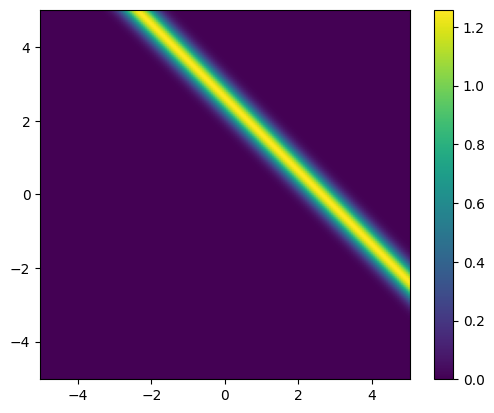

In [394]:
x1_lim = np.array([-5, 5])
x2_lim = np.array([-5, 5])
plot_pdf_2D(
    likelihood,
    x1_min=x1_lim[0], x1_max=x1_lim[1],
    x2_min=x2_lim[0], x2_max=x2_lim[1])

C:\Users\Ich\AppData\Local\Temp\ipykernel_1968\379094849.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distb_pdf[ii,jj] = np.exp(distb.logd([grid1[ii,jj], grid2[ii,jj]]))


(-5.0, 5.0)

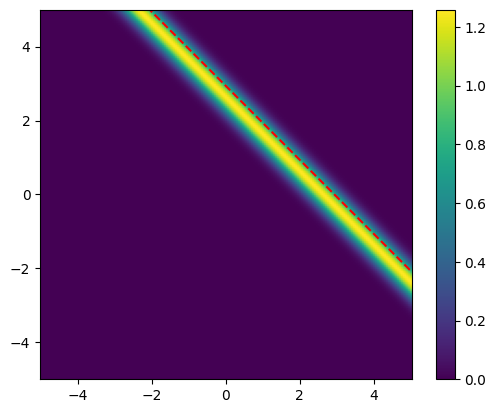

In [395]:
# Plot the likelihood
plot_pdf_2D(
    likelihood,
    x1_min=x1_lim[0], x1_max=x1_lim[1],
    x2_min=x2_lim[0], x2_max=x2_lim[1])

# Plot the line x2 = b_obs - x1
plt.plot(x1_lim, b_ofx(x=specific).sample()-x1_lim, '--r')
plt.ylim(x2_lim)

8. __Maximum Likelihood__

in the case of Gaussian noise is the least-squares solution

$$\mathbf{x}^* = \underset{\mathbf{x}}{\operatorname{argmin\;}} \frac{1}{2 \sigma^2} ||\mathbf{A}\mathbf{x}- bb||_2^2$$


We plot likelihood function again but with line $x_2 = bb-x_1$:

C:\Users\Ich\AppData\Local\Temp\ipykernel_1968\379094849.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distb_pdf[ii,jj] = np.exp(distb.logd([grid1[ii,jj], grid2[ii,jj]]))


(-5.0, 5.0)

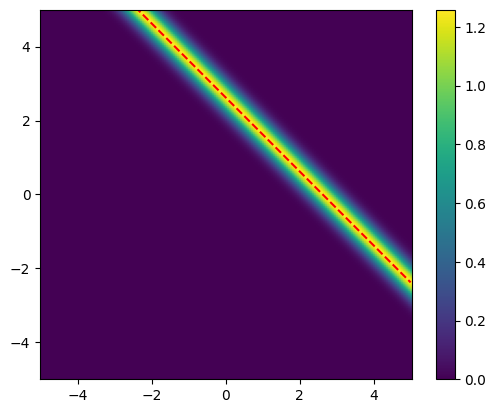

In [396]:
# Plot the likelihood
plot_pdf_2D(
    likelihood,
    x1_min=x1_lim[0], x1_max=x1_lim[1],
    x2_min=x2_lim[0], x2_max=x2_lim[1])

# Plot the line x2 = b_obs - x1
plt.plot(x1_lim, bb-x1_lim, '--r')
plt.ylim(x2_lim)

Note that:
- All the points on the line $x_2 = bb-x_1$ have the same likelihood value. 
- No unique ML point
- This is expected, since problem we are solving is: $bb = x_1 + x_2$
- Combining the likelihood with the prior will give us a unique maximum a posteriori (MAP) point estimate as we will see next.

9. __The posterior distribution__

- The posterior is proportional to product of **likelihood** and **prior**
$$\pi(\mathbf{x} | b) \propto \pi( b|\mathbf{x})\pi(\mathbf{x})$$

- Note that $\pi( b|\mathbf{x})$ here denotes the likelihood and not the data distribution, despite often written that way.



In [400]:
BP = BayesianProblem(b, x)


BayesianProblem with target: 
 JointDistribution(
    Equation: 
	p(b,x) = p(b|x)p(x)
    Densities: 
	b ~ CUQI Gaussian. Conditioning variables ['x'].
	x ~ CUQI Gaussian.
)


In [401]:
BP.set_data(b=bb)
print(BP)

BayesianProblem with target: 
 Posterior(
    Equation:
	 p(x|b) ∝ L(x|b)p(x)
    Densities:
	b ~ CUQI Gaussian Likelihood function. Parameters ['x'].
 	x ~ CUQI Gaussian.
 )


- different formats 
- b in the "legend"

## <font color=#CD853F> Maximum a posteriori (MAP) estimate </font> <a class="anchor" id="r-maximum-a-posteriori-map-estimate"></a>
 
- Maximizer of the posterior

$$\mathbf{x}^* = \underset{\mathbf{x}}{\operatorname{argmax\;}} \pi(\mathbf{x} | b)$$
- In the case with Gaussian noise and Gaussian prior, this is the classic Tikhonov solution

$$\mathbf{x}^* = \underset{\mathbf{x}}{\operatorname{argmin\;}} \frac{1}{2 \sigma^2} ||\mathbf{A}\mathbf{x}- b^\mathrm{obs}||_2^2 + \frac{1}{2\delta^2}||\mathbf{x} ||^2_2$$




## <font color=#CD853F> Sampling from the posterior </font> <a class="anchor" id="r-sampling-from-the-posterior"></a> 

The MAP point is a very useful point estimate, but it does not provide information about the uncertainty in the estimate. Thus, we need to sample from the posterior distribution to quantify the uncertainty.

Before sampling from the posterior distribution, let us plot the posterior distribution. 

**Note** that in this example the posterior distribution is a multivariate distribution of two parameters only and it is easy to evaluate the PDF of the posterior distribution over a grid of points in the parameter space. However, typically, the posterior distribution is high-dimensional and evaluating the PDF over an n-dimensional grid is not feasible.

C:\Users\Ich\AppData\Local\Temp\ipykernel_1968\379094849.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distb_pdf[ii,jj] = np.exp(distb.logd([grid1[ii,jj], grid2[ii,jj]]))


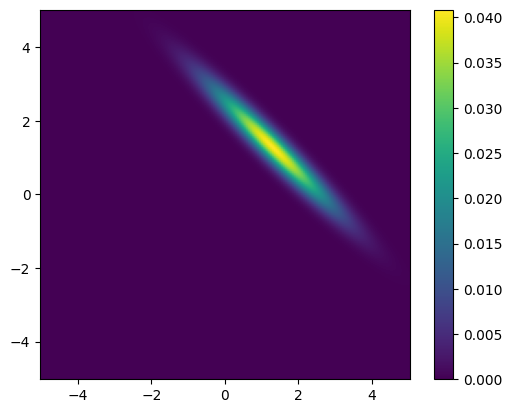

In [402]:
plot_pdf_2D(BP.posterior, x1_lim[0], x1_lim[1], x2_lim[0], x2_lim[1])